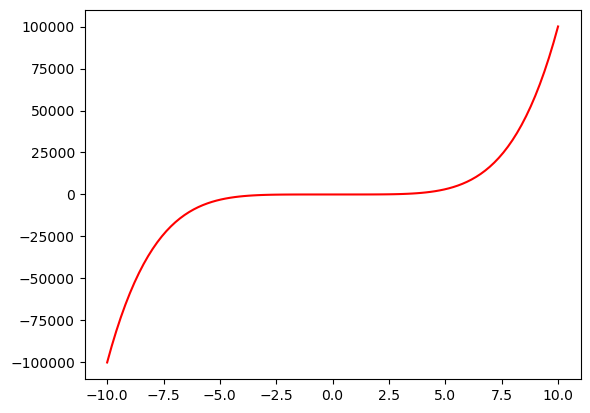

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math

def f(x):
    return x**5 + 3 * x - 1

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
plt.plot(x, np.power(x,5 ) + 3 * x - 1, color='red')

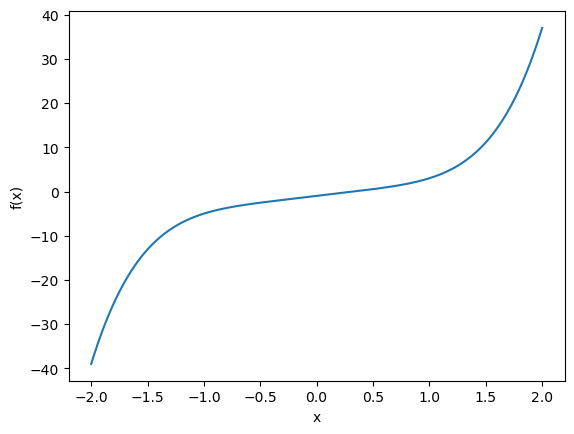

In [2]:
x = [i/100 for i in range(-200, 201)]  # Значения x от -2 до 2 с шагом 0.01
y = [f(xi) for xi in x]

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [3]:
print(2-0.023*((2)**5+3*(2)-1))

1.149


In [4]:
from matplotlib import pyplot as plt
import numpy as np
import math

def f(x):
    return x - 0.023 * (x**5 + 3 * x - 1)

def num_iterations(x0, epsilon, x1 = f(x0), alpha = 0.93, l = 0.023):
    return math.floor(math.log((epsilon * (1 - alpha)) / abs(x0 - x1), alpha) + 1)

def apost(xn, xn1, alpha = 0.93):
    return alpha / ( 1 - alpha ) * abs ( xn - xn1 )

def method(xn, xn1, epsilon, l = 0.023,):
    i = 0
    
    while apost(xn, xn1) > epsilon:
        i += 1
        xn = xn1
        xn1 = f(xn)
        
    return xn1, i

x0 = 1.5
epsilon = 1e-4

x, n = method(x0, f(x0), epsilon)

print(f"Априорная оценка количества итераций: {num_iterations(x0, epsilon)}")
print(f"Последняя итерация: {x}")
print(f"Номер последней операции: {n}")

NameError: name 'x0' is not defined

In [8]:
A = np.array([
    [0.9, 0.1, 0.1],
    [0.2, 1.1, 0.2],
    [0.1, 0.2, 1.2]])

B = np.array([
    [1],
    [1],
    [0]])

C = np.eye(A.shape[0]) - np.dot(A.T, A) / max(np.linalg.eigvals(np.dot(A.T, A)))

print(C)

[[ 0.57014144 -0.16494573 -0.12495888]
 [-0.16494573  0.37020723 -0.2349227 ]
 [-0.12495888 -0.2349227   0.25524506]]


In [9]:
A = np.array([
    [0.9, 0.1, 0.1],
    [0.2, 1.1, 0.2],
    [0.1, 0.2, 1.2]])

B = np.array([
    [1],
    [1],
    [0]])

D = np.dot(A.T, B) / max(np.linalg.eigvals(np.dot(A.T, A)))

print(D)

[[0.54981909]
 [0.59980264]
 [0.14995066]]


In [10]:
print(np.linalg.eigvals(C))

[4.44089210e-16 6.63231929e-01 5.32361797e-01]


In [11]:
def alpha(C):
    alpha = np.zeros(C.shape[0])
    
    for i in range(C.shape[0]):
        alpha[i] = np.sum(abs(C[i, :]))
    
    return np.max(alpha)

print(alpha(C))

0.8600460507480882


In [12]:
def F(X):
    return np.dot(C, X) + D

def num_iterations(X0, X1, epsilon = 1e-4):
    return math.floor(math.log((epsilon * (1 - alpha(C))) / alpha(X1 - X0), alpha(C)) + 1)

def apost(Xn, Xn1):
    return alpha(C) / (1 - alpha(C)) * alpha(Xn1 - Xn)

def method(Xn, Xn1, epsilon = 1e-4):
    i = 0
    
    while apost(Xn, Xn1) > epsilon:
        i += 1
        Xn = Xn1
        Xn1 = F(Xn)
        
    return Xn1, i

X0 = np.zeros((A.shape[0], 1))

X, n = method(X0, F(X0))

print(f"Априорная оценка количества итераций: {num_iterations(X0, X1 = F(X0))}")
print(f"Последняя итерация: \n{X}")
print(f"Номер последней операции: {n}")

Априорная оценка количества итераций: 71
Последняя итерация: 
[[ 1.05073355]
 [ 0.7569147 ]
 [-0.21371385]]
Номер последней операции: 23


In [13]:
print(np.dot(A, X))

[[ 9.99980277e-01]
 [ 1.00001011e+00]
 [-3.26496446e-07]]


In [14]:
def num_iterations(x0, epsilon, alpha):
    return math.floor(math.log((epsilon * (1 - alpha)) / abs(x0 - 1), alpha) + 1)

l= 2 / 3

x0 = 0

alpha = np.absolute(l)*(1 / 2)
epsilon = 1e-3

print (f"Априорная оценка количества итераций: {num_iterations(x0, epsilon, alpha)}")

Априорная оценка количества итераций: 7


In [15]:
ti = 0
grid = [ti]
a = 0
b = 1
m = 20

for i in range(m):
    ti += (b - a) / m
    grid.append(np.round(ti, 2))
    
print(grid)

[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


In [16]:
def simson(a, b, xn1):
    step = 0.05
    f = a * xn1[0];
    tmp = a
    result = 0
    
    for i in range(1 , m - 1):
        if i % 2 == 1:
            result += 4 * tmp * xn1[i];
        else :
            result += 2 * tmp * xn1[i];
        tmp += step;
        
    result += b * xn1[m - 1];
    result *= step;
    
    return result;

def apost(xn, xn1, alpha):
    return alpha / ( 1 - alpha ) * np.linalg.norm(xn - xn1, 1)

def method(grid, alpha):
    i = 0
    xn = np.zeros(m + 1)
    xn1 = np.zeros(m + 1)

    while True:
        i += 1
    
        for j in range(len(grid)):
            xn[j] = l * grid[j]**2 * simson (a, b, xn1) + grid[j]**3
        
        if(apost(xn1, xn, alpha) <= epsilon):
            break
        
        xn1 = np.copy(xn)
    
    return xn, i
    
def x_actual(t):
    return 4 * l * t**2 / (5 * (4 - l)) + t**3

xn, i = method(grid, alpha)

print (f"Количество итераций: {i}")

for i in range (len(grid)):
    print (f"t = {round(grid[i], 2)}  x[approx] = {xn[i]}  x[actual] = {x_actual(grid[i])}")

Количество итераций: 9
t = 0  x[approx] = 0.0  x[actual] = 0.0
t = 0.05  x[approx] = 0.001170365205151788  x[actual] = 0.0005250000000000001
t = 0.1  x[approx] = 0.005181460820607151  x[actual] = 0.0026000000000000007
t = 0.15  x[approx] = 0.012783286846366088  x[actual] = 0.0069749999999999986
t = 0.2  x[approx] = 0.024725843282428606  x[actual] = 0.014400000000000003
t = 0.25  x[approx] = 0.04175913012879469  x[actual] = 0.025625
t = 0.3  x[approx] = 0.06463314738546436  x[actual] = 0.04139999999999999
t = 0.35  x[approx] = 0.09409789505243757  x[actual] = 0.06247499999999999
t = 0.4  x[approx] = 0.13090337312971445  x[actual] = 0.08960000000000001
t = 0.45  x[approx] = 0.1757995816172948  x[actual] = 0.12352500000000001
t = 0.5  x[approx] = 0.22953652051517875  x[actual] = 0.16499999999999998
t = 0.55  x[approx] = 0.29286418982336637  x[actual] = 0.21477500000000005
t = 0.6  x[approx] = 0.3665325895418574  x[actual] = 0.27359999999999995
t = 0.65  x[approx] = 0.4512917196706522  x[a

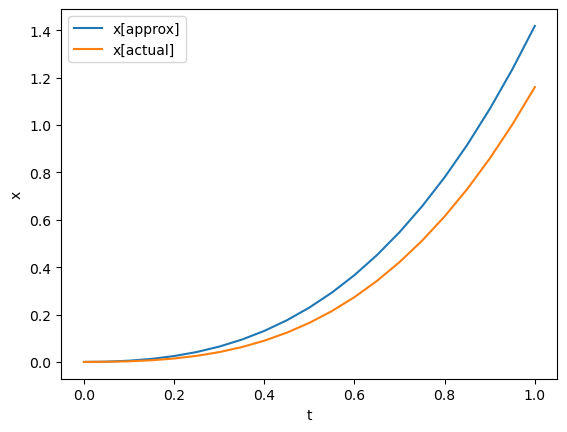

In [17]:
plt.plot(grid, xn, label='x[approx]')
plt.plot(grid, np.array([x_actual(t) for t in grid]), label='x[actual]')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.show()

In [18]:
def simson(a, b, xn1):
    step = 0.05
    f = a * xn1[0];
    tmp = a
    result = 0
    
    for i in range(1 , m - 1):
        if i % 2 == 1:
            result += 4 * tmp * xn1[i];
        else :
            result += 2 * tmp * xn1[i];
        tmp += step;
        
    result += b * xn1[m - 1];
    result *= step;
    
    return result;

def apost(xn, xn1, alpha):
    return alpha / ( 1 - alpha ) * np.linalg.norm(xn - xn1, 1)

def method(grid, alpha):
    i = 0
    xn = np.zeros(m + 1)
    xn1 = np.zeros(m + 1)

    while True:
        i += 1
    
        for j in range(len(grid)):
            xn[j] = l * grid[j]**2 * simson (a, b, xn1) + grid[j]**3
        
        if(apost(xn1, xn, alpha) <= epsilon):
            break
        
        xn1 = np.copy(xn)
    
    return xn, i
    
def x_actual(t):
    return 4 * l * t**2 / (5 * (4 - l)) + t**3

xn, i = method(grid, alpha)

print (f"Количество итераций: {i}")

for i in range (len(grid)):
    print (f"t = {round(grid[i], 2)}  x[approx] = {xn[i]}  x[actual] = {x_actual(grid[i])}")

Количество итераций: 9
t = 0  x[approx] = 0.0  x[actual] = 0.0
t = 0.05  x[approx] = 0.001170365205151788  x[actual] = 0.0005250000000000001
t = 0.1  x[approx] = 0.005181460820607151  x[actual] = 0.0026000000000000007
t = 0.15  x[approx] = 0.012783286846366088  x[actual] = 0.0069749999999999986
t = 0.2  x[approx] = 0.024725843282428606  x[actual] = 0.014400000000000003
t = 0.25  x[approx] = 0.04175913012879469  x[actual] = 0.025625
t = 0.3  x[approx] = 0.06463314738546436  x[actual] = 0.04139999999999999
t = 0.35  x[approx] = 0.09409789505243757  x[actual] = 0.06247499999999999
t = 0.4  x[approx] = 0.13090337312971445  x[actual] = 0.08960000000000001
t = 0.45  x[approx] = 0.1757995816172948  x[actual] = 0.12352500000000001
t = 0.5  x[approx] = 0.22953652051517875  x[actual] = 0.16499999999999998
t = 0.55  x[approx] = 0.29286418982336637  x[actual] = 0.21477500000000005
t = 0.6  x[approx] = 0.3665325895418574  x[actual] = 0.27359999999999995
t = 0.65  x[approx] = 0.4512917196706522  x[a

In [19]:
def num_iterations(x0, epsilon, alpha):
    return math.floor(math.sqrt(7)*math.log((epsilon * (1 - alpha)), alpha) + 1)

l= 2 / 3

x0 = 0

alpha = np.absolute(l)*(1 / math.sqrt(15))
epsilon = 1e-3

print (f"Априорная оценка количества итераций: {num_iterations(x0, epsilon, alpha)}")

Априорная оценка количества итераций: 11


In [20]:
def simson(a, b, xn1):
    step = 0.05
    f = a * xn1[0];
    tmp = a
    result = 0
    
    for i in range(1 , m - 1):
        if i % 2 == 1:
            result += 4 * tmp * xn1[i];
        else :
            result += 2 * tmp * xn1[i];
        tmp += step;
        
    result += b * xn1[m - 1];
    result *= step;
    
    return result;

def apost(xn, xn1, alpha):
    return alpha / ( 1 - alpha ) * np.linalg.norm(xn - xn1)

def method(grid, alpha):
    i = 0
    xn = np.zeros(m + 1)
    xn1 = np.zeros(m + 1)

    while True:
        i += 1
    
        for j in range(len(grid)):
            xn[j] = l * grid[j]**2 * simson (a, b, xn1) + grid[j]**3
        
        if(apost(xn1, xn, alpha) <= epsilon):
            break
        
        xn1 = np.copy(xn)
    
    return xn, i
    
def x_actual(t):
    return 4 * l * t**2 / (5 * (4 - l)) + t**3

xn, i = method(grid, alpha)

print (f"Количество итераций: {i}")

for i in range (len(grid)):
    print (f"t = {round(grid[i], 2)}  x[approx] = {xn[i]}  x[actual] = {x_actual(grid[i])}")

Количество итераций: 7
t = 0  x[approx] = 0.0  x[actual] = 0.0
t = 0.05  x[approx] = 0.0011684829554924128  x[actual] = 0.0005250000000000001
t = 0.1  x[approx] = 0.005173931821969651  x[actual] = 0.0026000000000000007
t = 0.15  x[approx] = 0.01276634659943171  x[actual] = 0.0069749999999999986
t = 0.2  x[approx] = 0.024695727287878604  x[actual] = 0.014400000000000003
t = 0.25  x[approx] = 0.04171207388731031  x[actual] = 0.025625
t = 0.3  x[approx] = 0.06456538639772684  x[actual] = 0.04139999999999999
t = 0.35  x[approx] = 0.0940056648191282  x[actual] = 0.06247499999999999
t = 0.4  x[approx] = 0.13078290915151441  x[actual] = 0.08960000000000001
t = 0.45  x[approx] = 0.17564711939488542  x[actual] = 0.12352500000000001
t = 0.5  x[approx] = 0.22934829554924124  x[actual] = 0.16499999999999998
t = 0.55  x[approx] = 0.29263643761458197  x[actual] = 0.21477500000000005
t = 0.6  x[approx] = 0.36626154559090734  x[actual] = 0.27359999999999995
t = 0.65  x[approx] = 0.4509736194782177  x[

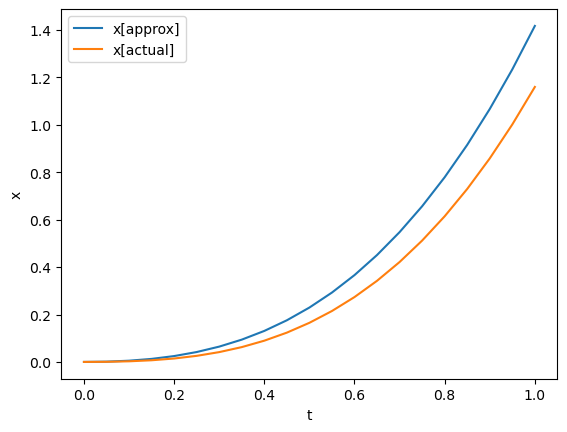

In [21]:
plt.plot(grid, xn, label='x[approx]')
plt.plot(grid, np.array([x_actual(t) for t in grid]), label='x[actual]')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.show()

In [ ]:
def num_iterations(x0, epsilon, alpha):
    return math.floor(math.log((epsilon * (1 - alpha)) / abs(x0 - 1), alpha) + 1)

l= 2 / 3

x0 = 0

alpha = np.absolute(l)*(1 / 2)
epsilon = 1e-3

print (f"Априорная оценка количества итераций: {num_iterations(x0, epsilon, alpha)}")